In [8]:
import pandas as pd

# Specify the paths for the Excel and CSV files
excel_file = r'C:\Users\Onkar Nath\Desktop\sp1\BANK\CSV_Matrix_2.0_Group_A.xlsx'
csv_file = r'C:\Users\Onkar Nath\Desktop\sp1\BANK\CSV_Matrix_2.0_Group_A.csv'

# Load the Excel file and check available sheet names
xls = pd.ExcelFile(excel_file)
print("Available sheet names:", xls.sheet_names)

# Specify the sheet name to read
sheet_name = 'Bank_Churn'

# Check if the specified sheet name exists in the available sheet names
if sheet_name in xls.sheet_names:
    # Read the specified sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)

    # Convert the DataFrame to a CSV file
    df.to_csv(csv_file, index=False)

    print(f"Data from '{sheet_name}' has been successfully converted to CSV.")
else:
    print(f"Error: The sheet name '{sheet_name}' does not exist in the Excel file.")


Available sheet names: ['Guidelines', 'Bank_Churn']
Data from 'Bank_Churn' has been successfully converted to CSV.


In [9]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
null_counts = df.isnull().sum()
print(null_counts)


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [32]:

print(df.dtypes)

print(df.describe())


CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.24000

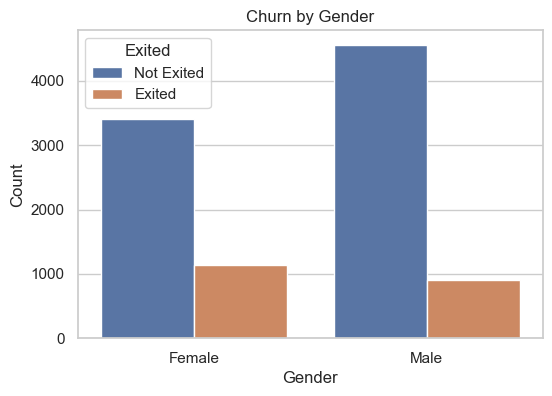

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Bar Chart for Gender vs Churn
plt.figure(figsize=(6, 4))  # Further reduced size
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()



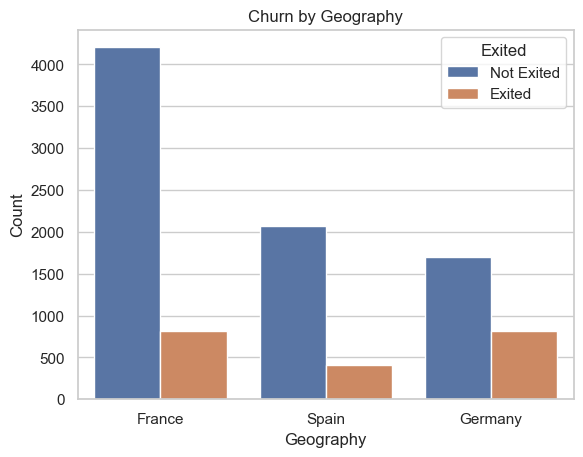

In [17]:
plt.figure()
# This graph illustrates churn rates across different geographical regions.
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()


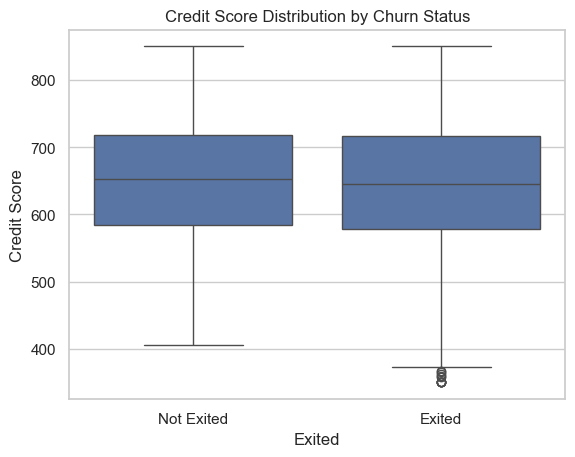

In [18]:
plt.figure()
# This graph displays the distribution of credit scores for customers who exited versus those who did not.
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()


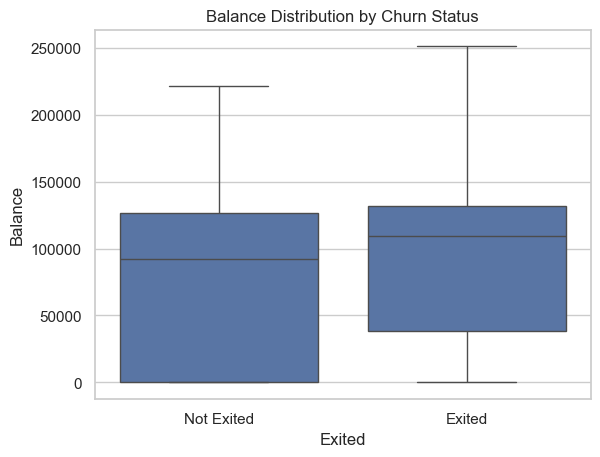

In [19]:
plt.figure()
# This graph shows the distribution of account balances between customers who exited and those who did not.
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()


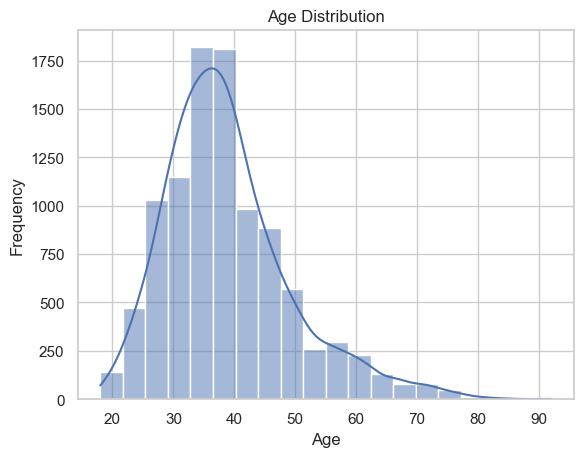

In [20]:
plt.figure()
# This graph represents the distribution of customer ages in the dataset.
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [27]:
df.columns.tolist()

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [31]:
len(df.columns)


13

In [33]:
print(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [42]:
country_counts = df['Geography'].value_counts()
print(country_counts)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [46]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# droppomg surname
categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ],
    remainder='drop'
)

df_encoded = preprocessor.fit_transform(df)

encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(encoded_columns) + numerical_cols

df_encoded = pd.DataFrame(df_encoded, columns=all_columns)

df_encoded.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [39]:
print(df_encoded.dtypes)

Geography_France     float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Female        float64
Gender_Male          float64
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
dtype: object


In [41]:
len(df_encoded.columns)

13

In [48]:
df_encoded['Exited'] = df['Exited']


In [49]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

rfc.score(X_test,y_test)

0.866

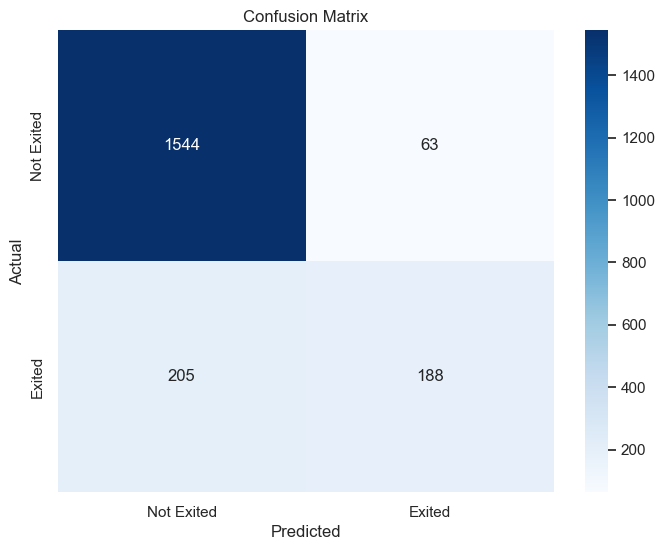

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rfc.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



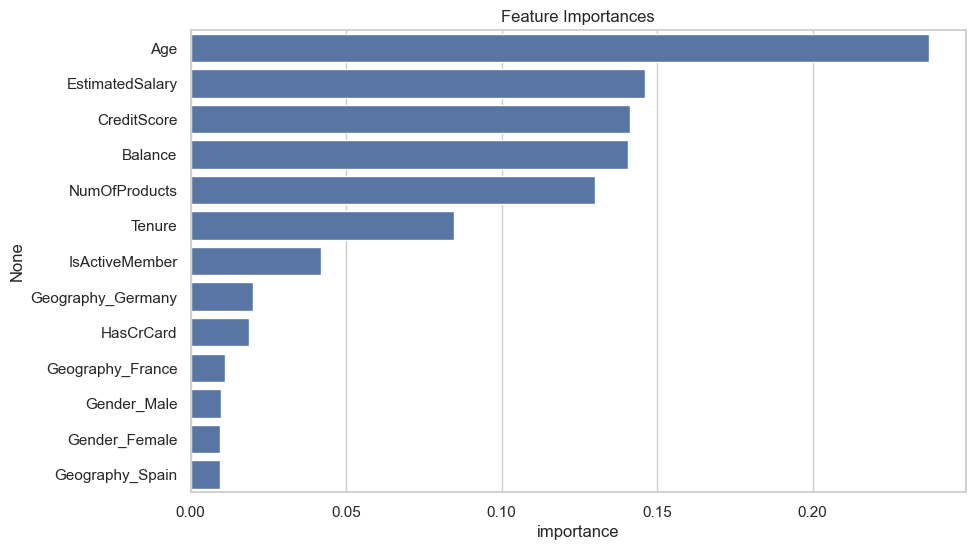

In [54]:
import pandas as pd

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()
